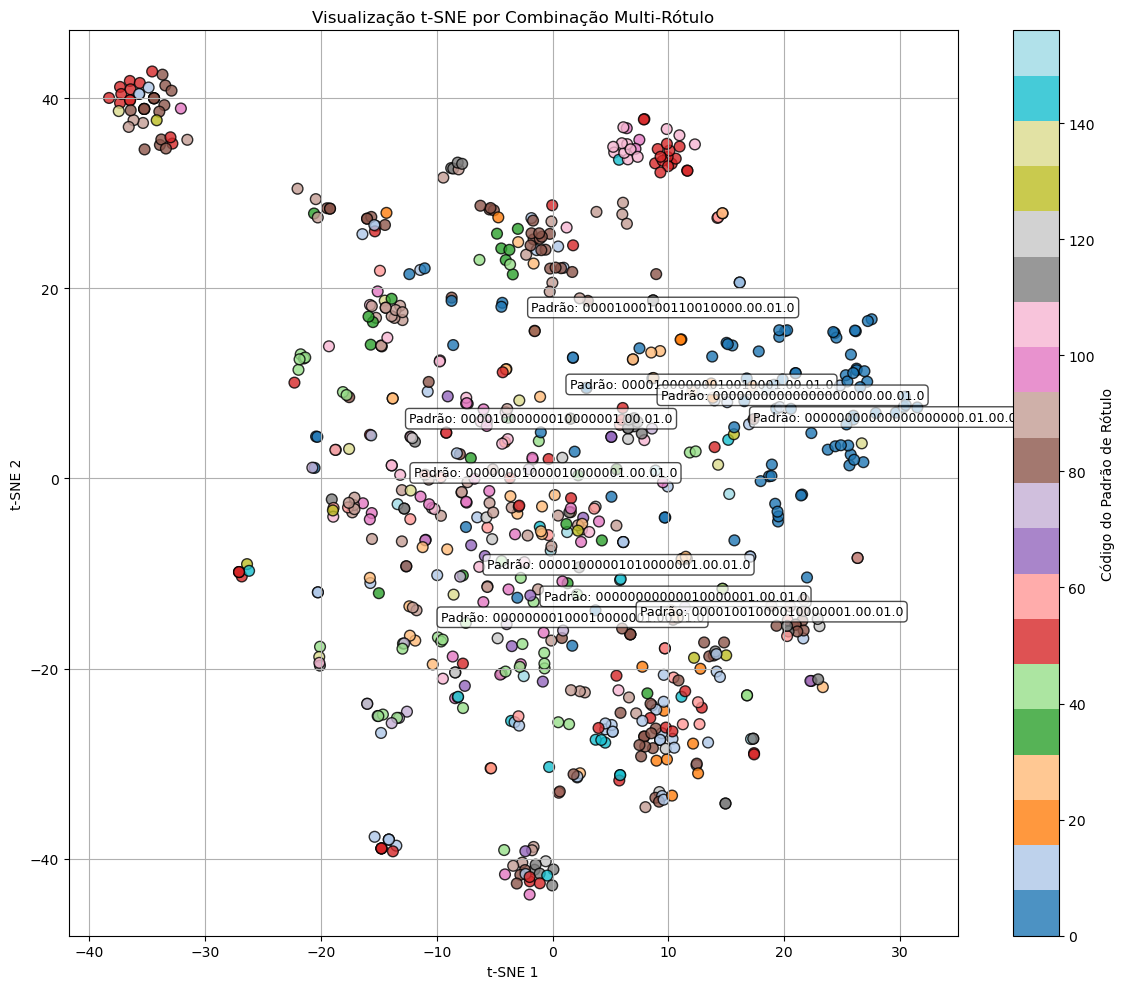


Combinações de rótulos mais comuns:
Padrão: 00000000000010000001.00.01.0, Contagem: 48
Padrão: 00001000000010000001.00.01.0, Contagem: 47
Padrão: 00000000000000000000.01.00.0, Contagem: 43
Padrão: 00000001000010000001.00.01.0, Contagem: 40
Padrão: 00001000000010010001.00.01.0, Contagem: 25
Padrão: 00001000100110010000.00.01.0, Contagem: 22
Padrão: 00001000001010000001.00.01.0, Contagem: 21
Padrão: 00000000000000000000.00.01.0, Contagem: 21
Padrão: 00000000100010000001.00.01.0, Contagem: 20
Padrão: 00001001000010000001.00.01.0, Contagem: 19

Frequência de features individuais:
Art. 292, §3º (Retificado o valor da causa): 17
61774 (Determinada a Retificação de Partes no Cadastro do Processo Digital): 20
14738 (Retificação de Classe Processual): 6
334 (Justiça Gratuita Não Concedida): 4
787 (Justiça Gratuita Concedida): 297
15103 (Justiça Gratuita Concedida em Parte): 3
60586 (Recebida a Petição Inicial): 1
12261 (Recebida Emenda à Inicial): 167
332 (concedida tutela): 139
889 (tutela co

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# Passo 1: Carregar o dataset
# Usando o nome de arquivo correto e o separador adequado (vírgula ao invés de tab)
df = pd.read_csv("/home/guilherme-burzynski-dienes/Documents/UFSC/Artigo multirotulo/testinho2.csv", sep=',')

# Passo 2: Limpeza dos dados
df['Content'] = df['Content'].fillna("")

# Passo 3: Usar texto + flags binárias
# A primeira coluna é o índice/ID, as colunas do meio são as características binárias
# A última coluna é o texto (Content)
text_col = 'Content'
feature_cols = df.columns[1:-1]  # todas as colunas exceto a primeira (ID) e a última (texto)
label_matrix = df[feature_cols]

# Passo 4: Criar strings de rótulos para combinações únicas
# Convertendo para string e combinando em uma única string por linha
df['LabelPattern'] = label_matrix.astype(str).agg(''.join, axis=1)

# Passo 5: Vetorizar o texto
vectorizer = TfidfVectorizer(max_features=1000)
# Verificar se há dados suficientes no conjunto
if len(df) > 0 and not df[text_col].isna().all():
    X_tfidf = vectorizer.fit_transform(df[text_col])
    
    # Passo 6: Aplicar t-SNE
    # Reduzindo a perplexidade se o conjunto de dados for pequeno
    perplexity_value = min(30, max(5, len(df) // 10))
    tsne = TSNE(n_components=2, perplexity=perplexity_value, 
                init='pca', learning_rate='auto', random_state=42)
    X_tsne = tsne.fit_transform(X_tfidf.toarray())
    
    # Passo 7: Codificar padrões de rótulos para coloração
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df['LabelPattern'])
    
    # Passo 8: Gerar o gráfico
    plt.figure(figsize=(12, 10))
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab20', 
                          s=60, alpha=0.8, edgecolors='k')
    plt.title("Visualização t-SNE por Combinação Multi-Rótulo")
    plt.xlabel("t-SNE 1")
    plt.ylabel("t-SNE 2")
    plt.grid(True)
    plt.colorbar(scatter, label='Código do Padrão de Rótulo')
    
    # Adicionar legenda para os padrões de rótulos mais comuns
    from collections import Counter
    pattern_counts = Counter(df['LabelPattern'])
    top_patterns = pattern_counts.most_common(10)
    for pattern, _ in top_patterns:
        pattern_idx = label_encoder.transform([pattern])[0]
        pattern_positions = y == pattern_idx
        if any(pattern_positions):
            centroid_x = X_tsne[pattern_positions, 0].mean()
            centroid_y = X_tsne[pattern_positions, 1].mean()
            plt.annotate(f"Padrão: {pattern}", 
                         (centroid_x, centroid_y),
                         fontsize=9,
                         bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))
    
    plt.tight_layout()
    plt.savefig('visualizacao_tsne.png')
    plt.show()
    
    # Passo 9: Análise adicional - mostrar as combinações de rótulos mais comuns
    print("\nCombinações de rótulos mais comuns:")
    for pattern, count in pattern_counts.most_common(10):
        print(f"Padrão: {pattern}, Contagem: {count}")
    
    # Passo 10: Análise de frequência de features individuais
    print("\nFrequência de features individuais:")
    for col in feature_cols:
        count = df[col].sum()
        print(f"{col}: {count}")
else:
    print("Conjunto de dados vazio ou sem conteúdo textual válido.")